# Super (Git) Star

将爬取的GitHub数据划分为80%训练集和20%测试集。训练一个线性模型，基于其他属性，尝试预测项目获得的星标数。

1. 划分数据集
2. 选择/预处理特征
3. 训练模型
4. 测试模型
5. 尝试分析结果

In [84]:
import pandas as pd
import numpy as np

# 0.数据预览

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


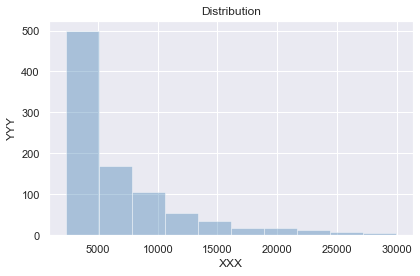

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_distribution_histogram(nums, path, is_hist=True, is_kde=True, is_rug=False, \
  is_vertical=False, is_norm_hist=False):
  """

  bins: 设置直方图条形的数目
  is_hist: 是否绘制直方图
  is_kde: 是否绘制核密度图
  is_rug: 是否绘制生成观测数值的小细条
  is_vertical: 如果为True，观察值在y轴上
  is_norm_hist: 如果为True，直方图高度显示一个密度而不是一个计数，如果kde设置为True，则此参数一定为True
  """
  sns.set()  #切换到sns的默认运行配置
  sns.distplot(
    nums, bins=10, hist=is_hist, kde=is_kde, rug=is_rug, 
    hist_kws={"color":"steelblue"}, kde_kws={"color":"purple"},
    vertical=is_vertical, norm_hist=is_norm_hist
  )
  #添加x轴和y轴标签
  plt.xlabel("XXX")
  plt.ylabel("YYY")

  #添加标题
  plt.title("Distribution")
  plt.tight_layout()  # 处理显示不完整的问题
  plt.savefig(path, dpi=300)

data = pd.read_csv('GithubSpiderProMax\info7.csv')
label = []
for i, star in enumerate(data['stars']):
    if star > 30000:
        label.append(i)
path = "distribution.jpg"
x = data['stars'].drop(label)
draw_distribution_histogram(x, path, is_hist=True, is_kde=False, is_norm_hist=False)

## 1. 划分数据集

In [86]:
# split into train and test
data = data.sample(frac=1)
def split_data(data, train_rate=0.8):
    train = data[:int(train_rate*data.shape[0])]
    test = data[int(train_rate*data.shape[0] + 1):]
    return train, test

train_set, test_set = split_data(data)
data['stars'].map(lambda x : x/max(data['stars']))

241    0.044991
223    0.047182
636    0.017440
178    0.055689
293    0.039382
         ...   
527    0.021713
431    0.027680
826    0.013564
659    0.016744
532    0.021390
Name: stars, Length: 965, dtype: float64

## 2. 选择/预处理特征

In [87]:
def get_features(data):
    columns = [
        data['stars'],data['forks'],data['release'],data['contributors'],data['branches'],
        data['open_issues'],data['closed_issues'],data['open_pulls'],data['closed_pulls']
    ]
    targets = columns[0]
    # targets = targets.map(lambda x : x/max(columns[0]))
    features = pd.concat(columns[1:], axis=1)
    return np.array(features), np.array(targets)

train_set_features, train_set_targets = get_features(train_set)
test_set_features, test_set_targets = get_features(test_set)

train_set_features.shape, train_set_targets.shape

((772, 8), (772,))

## 3. 训练模型


In [88]:
from sklearn.neural_network import MLPRegressor

# layers = list(map(lambda x : int(x), np.logspace(16, 8, num = 9, base=2)))
# layers.extend(list(map(lambda x : int(x), np.logspace(7, 7, num = 3, base=2))))
# layers.extend(list(map(lambda x : int(x), np.logspace(6, 5, num = 2, base=2))))
# layers.extend(list(map(lambda x : int(x), np.logspace(6, 6, num = 1, base=2))))
# layers.extend(list(map(lambda x : int(x), np.logspace(7, 7, num = 3, base=2))))
# layers.extend(list(map(lambda x : int(x), np.logspace(8, 16, num = 9, base=2))))

layers = list(map(lambda x : int(x), np.logspace(10, 5, num = 6, base=2)))
layers.extend(list(map(lambda x : int(x), np.logspace(6, 10, num = 5, base=2))))
model_MLP = MLPRegressor(hidden_layer_sizes=(layers), max_iter=10000)
model_MLP.fit(train_set_features, train_set_targets)

MLPRegressor(hidden_layer_sizes=[1024, 512, 256, 128, 64, 32, 64, 128, 256, 512,
                                 1024],
             max_iter=10000)

In [89]:
from sklearn.linear_model import LinearRegression

model_Linear = LinearRegression()
model_Linear.fit(train_set_features, train_set_targets)

LinearRegression()

## 4. 测试模型


In [90]:
train_set_predict = model_MLP.predict(train_set_features)
test_set_predict = model_MLP.predict(test_set_features)

train_MAPE = 1-np.mean(abs(train_set_predict-train_set_targets)/train_set_targets)
train_acc = model_MLP.score(train_set_features, train_set_targets)

test_MAPE = 1-np.mean(abs(test_set_predict-test_set_targets)/test_set_targets)
test_acc = model_MLP.score(test_set_features, test_set_targets)

print(f'train_MAPE: {train_MAPE}')
print(f'train_acc: {train_acc}')
print(f'test_MAPE: {test_MAPE}')
print(f'test_acc: {test_acc}') 

train_MAPE: 0.5126183469301555
train_acc: 0.746875836225799
test_MAPE: 0.5328613379114857
test_acc: 0.8275007298840821


## 5. 尝试分析结果

In [92]:
# any plotting if you want
print(layers)

np.around(train_set_predict[:50]) ,train_set_targets[:50]
# test_set_predict

[1024, 512, 256, 128, 64, 32, 64, 128, 256, 512, 1024]


(array([ 3496.,  5836.,   763.,  7255., 17482.,  4435.,  2862.,  1931.,
         1775.,  2121., 10161.,  5007.,  7204., 52012.,  2520.,  4705.,
         1672., 13932.,  3000.,  3299.,  4107.,  2583.,  5855.,  1097.,
        21952.,  1542.,  3539.,  1607.,  1517.,  4539.,  3721.,  5739.,
         3619.,  5351.,  4644., 13824.,  4987., 10829.,  1019.,  1829.,
         2132.,  2394.,  1214.,   707.,  3141.,  8231.,  1457.,  8352.,
         1560.,  2551.]),
 array([ 9055,  9496,  3510, 11208,  7926,  4771,  3084,  3251,  6294,
         5629, 17689,  8721, 21723, 51882,  3423, 10258,  2870, 16228,
         4384,  3136,  3574,  2493, 13566,  3056,  8439,  2535,  4568,
         3108,  2525,  5723,  3310,  9790,  3562,  5686,  5940, 10552,
         4172,  3462,  2978,  2605,  2781,  7162,  2733,  3363,  2442,
         4171,  6347,  9550,  4066,  2461], dtype=int64))